In [1]:
##Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from sklearn.cluster import KMeans

In [7]:
#Read the data
df  = pd.read_csv('Mall_Customers.csv')

In [8]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Customer Mall Data
- Mall wants to create a strategies for their customers
- Annual income high- we should target the customers

### EDA

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [11]:
df.skew()

<ipython-input-11-9e0b1e29546f>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


CustomerID                0.000000
Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

In [12]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [13]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [14]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [16]:
X.iloc[0]

Annual Income (k$)        15
Spending Score (1-100)    39
Name: 0, dtype: int64

### Elbow curve to find the optimal number of clusters

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


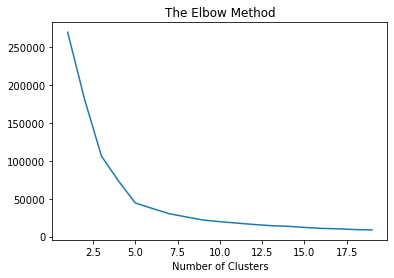

In [17]:
WCSS = []
for k in range(1,20):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 3)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)
plt.plot(range(1,20), WCSS)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.show()

### Lets take k-value = 5

In [19]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 3)
kmeans.fit(X)
Clusters = kmeans.predict(X)

In [20]:
Clusters

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 1, 0, 1, 4, 1, 4, 1,
       0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1])

In [ ]:
##annual income- 0 cluster,1,2,3,4
## speding - 0,1,2,3,4

In [21]:
#0, 1,2,3,4

### Visualize the cluster

In [27]:
X.head(2)

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81


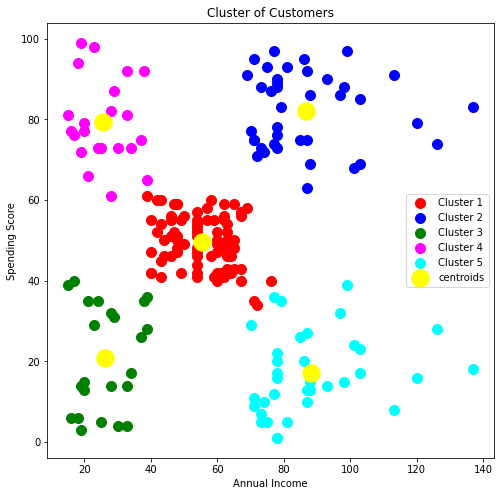

In [25]:
plt.figure(figsize = (8,8))
plt.scatter(X.iloc[Clusters == 0,0], X.iloc[Clusters == 0,1], s =100, c= 'red', label = 'Cluster 1')
plt.scatter(X.iloc[Clusters == 1,0], X.iloc[Clusters == 1,1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X.iloc[Clusters == 2,0], X.iloc[Clusters == 2,1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X.iloc[Clusters == 3,0], X.iloc[Clusters == 3,1], s = 100, c = 'magenta', label = 'Cluster 4')
plt.scatter(X.iloc[Clusters == 4,0], X.iloc[Clusters == 4,1], s = 100, c = 'cyan', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s= 300, c = 'yellow', label = 'centroids')
plt.title('Cluster of Customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()